In [1]:
%matplotlib inline

import os 
import json
import pandas as pd

import pycoco as pcc

In [2]:
# output_dir = "/Users/berto/projects/SDSS_sims/SDSS_SESNE_1/lcs/"
output_dir = "/Users/berto/projects/SDSS_sims/lcs/"
# output_dir = "/Users/berto/projects/SDSS_sims/testing/lcs/"
outlist = os.listdir(output_dir)
outlist = [i for i in outlist if i != ".DS_Store"]

# log_dir = "/Users/berto/projects/SDSS_sims/testing/logs/"
# log_dir = "/Users/berto/projects/SDSS_sims/SDSS_SESNE_1/logs/"
log_dir = "/Users/berto/projects/SDSS_sims/logs/"
log_list = os.listdir(log_dir)
log_list = [i for i in log_list if i != ".DS_Store"]

In [3]:
outlist[:5]

['SN_000001.dat',
 'SN_000002.dat',
 'SN_000003.dat',
 'SN_000004.dat',
 'SN_000005.dat']

In [4]:
log_list[:5]

['LOG_SN_000001.json',
 'LOG_SN_000002.json',
 'LOG_SN_000003.json',
 'LOG_SN_000004.json',
 'LOG_SN_000005.json']

/Users/berto/projects/SDSS_sims/lcs/SN_000001.dat


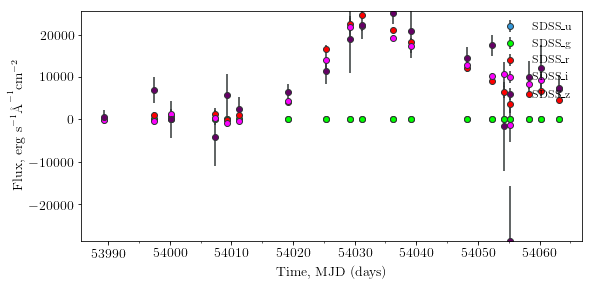

/Users/berto/projects/SDSS_sims/lcs/SN_000002.dat


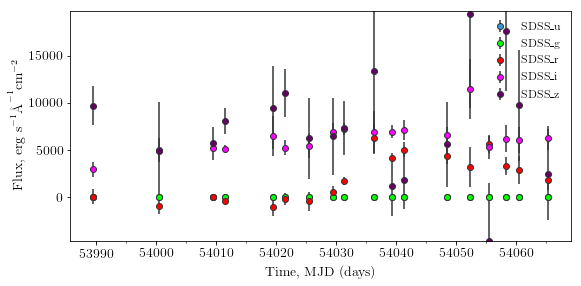

/Users/berto/projects/SDSS_sims/lcs/SN_000003.dat


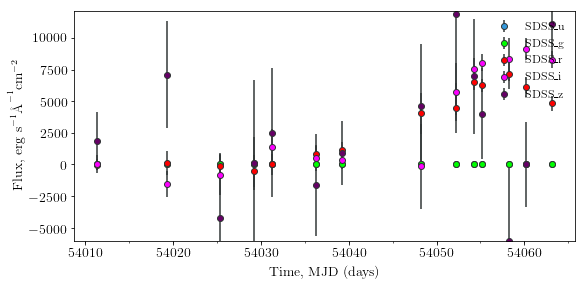

/Users/berto/projects/SDSS_sims/lcs/SN_000004.dat


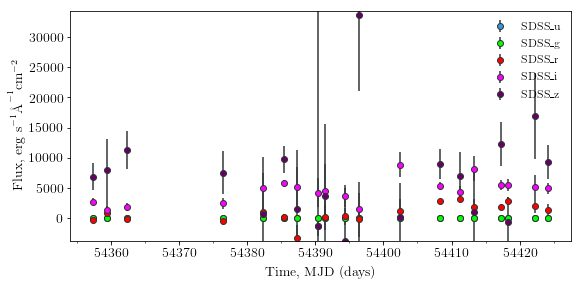

/Users/berto/projects/SDSS_sims/lcs/SN_000005.dat


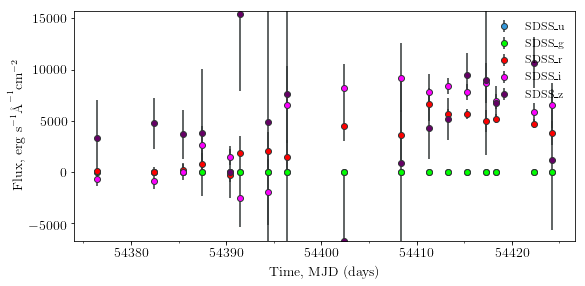

/Users/berto/projects/SDSS_sims/lcs/SN_000006.dat


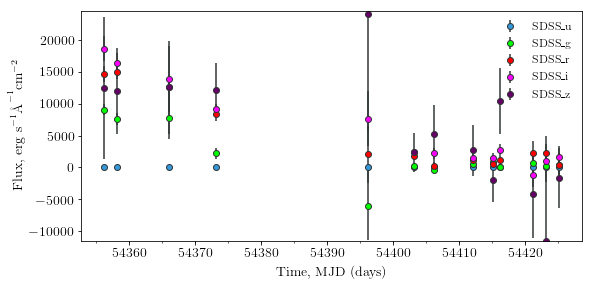

/Users/berto/projects/SDSS_sims/lcs/SN_000007.dat


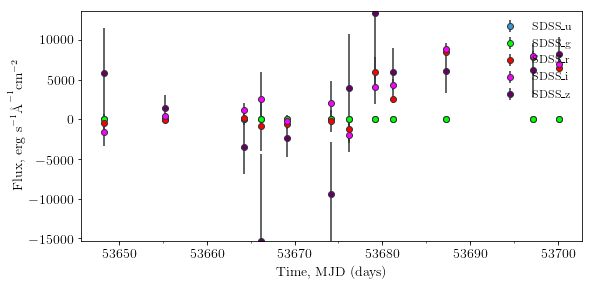

/Users/berto/projects/SDSS_sims/lcs/SN_000008.dat


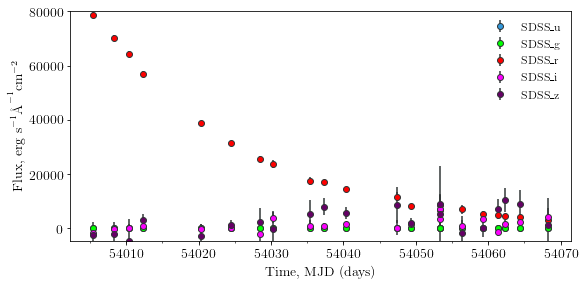

/Users/berto/projects/SDSS_sims/lcs/SN_000009.dat


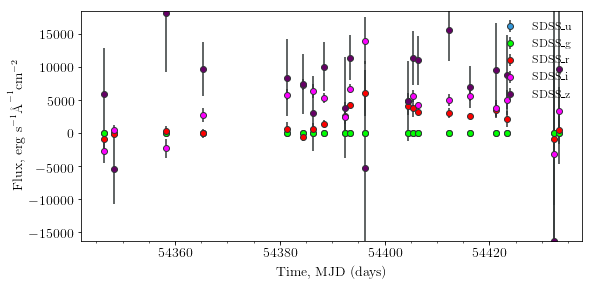

/Users/berto/projects/SDSS_sims/lcs/SN_000010.dat


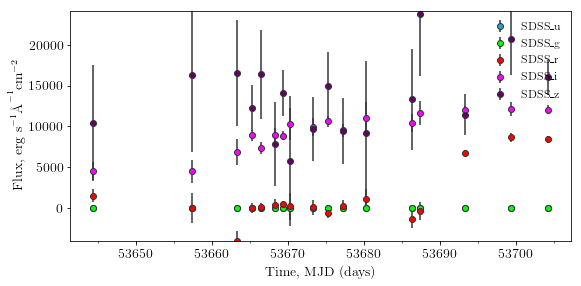

In [5]:
verbose = True
for i, snpath in enumerate(outlist):
    snpath = os.path.join(output_dir, snpath)
    if verbose: print(snpath)
    p = pcc.PhotometryClass()
    p.load(snpath)

    p.plot(enforce_zero=False)
    if i == 9:
        break

In [6]:
p.phot

MJD,flux,flux_err,filter
d,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
float64,float64,float64,str6
53644.379,0.0,0.0,SDSS_g
53644.379,4470.8505741,1200.42107486,SDSS_i
53644.379,1486.91125208,808.093148098,SDSS_r
53644.379,0.0,0.0,SDSS_u
53644.379,10466.0486508,7057.60767416,SDSS_z
53657.391,0.0,0.0,SDSS_g
53657.391,4461.68007076,1450.19827493,SDSS_i
53657.391,-7.3194143694,1835.4925103,SDSS_r


In [7]:
# df = pd.DataFrame()
verbose = False
alldata = {}
# list_list = ["host_EBV", "mjdmax", "z_sim"]
list_list = ["host_EBV", "mjdmax"]

for j, snlog in enumerate(log_list):
    snlog = os.path.join(log_dir, snlog)
    if verbose: print(snlog)
    with open(snlog, "r") as json_file:  
        data = json.load(json_file)
        json_file.close()
    if j == 0:
        for keystring in data.keys():
            if keystring != "flux" and keystring != "w":
                alldata[keystring] = []
            
    for keystring in data.keys():
#         print(keystring)
        if keystring != "flux" and keystring != "w":
            if keystring in list_list:
                alldata[keystring].append(data[keystring][0])
            else:
                alldata[keystring].append(data[keystring])
            
            
            

In [8]:
alldata.keys()

dict_keys(['CCD_index', 'MW_EBV', 'field', 'field_index', 'gentime', 'host_EBV', 'logpath', 'mag_offset', 'mjdmax', 'n', 'n_sne', 'snindex', 'snname', 'subtype', 'z_sim'])

In [9]:
output_df = pd.DataFrame.from_dict(alldata)

In [10]:
output_df

,CCD_index,MW_EBV,field,field_index,gentime,host_EBV,logpath,mag_offset,mjdmax,n,n_sne,snindex,snname,subtype,z_sim
0,222,0.045,82N,0,2017-09-12 14:34:04.932918,0.039458,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,-0.241051,54032.048226,16,0,8,SN2006aj,Ic,0.180386
1,482,0.076,82N,0,2017-09-12 14:34:04.932918,0.100640,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,0.128441,54034.473039,54,1,20,SN2011bm,Ic,0.349019
2,227,0.036,82N,0,2017-09-12 14:34:04.932918,0.088493,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,-0.101512,54060.154254,80,2,3,SN1998bw,Ic,0.340269
3,363,0.040,82S,1,2017-09-12 14:34:04.932918,0.346997,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,-0.076636,54398.184488,300,3,20,SN2011bm,Ic,0.327351
4,433,0.039,82S,1,2017-09-12 14:34:04.932918,0.224437,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,-0.410950,54412.679130,399,4,18,SN2009jf,Ib,0.191753
5,93,0.054,82N,0,2017-09-12 14:34:04.932918,0.078769,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,0.035771,54359.848104,440,5,5,SN2003jd,Ic,0.171323
6,179,0.065,82S,1,2017-09-12 14:34:04.932918,0.119853,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,-0.042961,53691.980579,508,6,8,SN2006aj,Ic,0.230615
7,389,0.026,82S,1,2017-09-12 14:34:04.932918,0.084894,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,-0.175775,54048.713668,589,7,20,SN2011bm,Ic,0.710565
8,399,0.034,82N,0,2017-09-12 14:34:04.932918,0.007599,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,-0.332446,54382.697966,747,8,20,SN2011bm,Ic,0.570404
9,434,0.032,82N,0,2017-09-12 14:34:04.932918,0.020210,/Users/berto/projects/SDSS_sims/logs/LOG_SN_00...,-0.119697,53693.664224,750,9,20,SN2011bm,Ic,0.344411


398    39
415    37
461    34
432    34
434    34
414    32
410    32
310    32
439    31
244    31
328    31
459    31
443    31
273    31
388    31
296    31
466    31
282    31
449    31
292    30
453    30
437    30
221    30
425    30
336    29
412    29
393    29
327    29
289    29
416    29
       ..
20      5
7       5
549     5
553     4
550     4
540     4
557     4
542     4
3       4
559     4
13      4
5       4
556     4
548     4
11      4
1       3
539     3
562     3
545     3
544     3
552     2
554     2
566     2
564     2
547     2
560     1
558     1
565     1
570     1
567     1
Name: CCD_index, dtype: int64


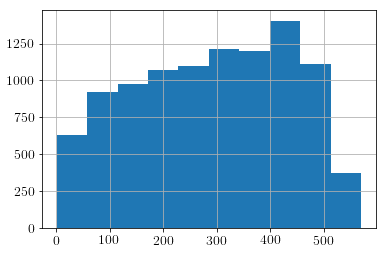

In [11]:
print(output_df["CCD_index"].value_counts())
output_df["CCD_index"].hist()

In [12]:
print(output_df["field"].value_counts())


82N    5175
82S    4825
Name: field, dtype: int64


20    3539
19    1209
3     1128
5      967
8      649
16     537
6      495
7      390
18     163
0      163
21     127
4      110
2       92
10      81
25      64
24      62
17      52
12      41
14      34
11      29
23      23
1       16
22      11
15       9
9        6
13       3
Name: snindex, dtype: int64


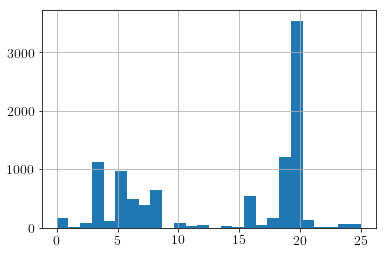

In [13]:
print(output_df["snindex"].value_counts())
output_df["snindex"].hist(bins = len(output_df["snindex"].unique()))

In [14]:
print(output_df["snname"].value_counts())


SN2011bm     3539
SN2010al     1209
SN1998bw     1128
SN2003jd      967
SN2006aj      649
SN2009bb      537
SN2005bf      495
SN2005hg      390
SN2009jf      163
SN1993J       163
SN2011dh      127
SN2002ap      110
SN1996cb       92
SN2007Y        81
iPTF13bvn      64
SN2013ge       62
SN2009iz       52
SN2007uy       41
SN2008ax       34
SN2007gr       29
SN2012ap       23
SN1994I        16
SN2011ei       11
SN2008bo        9
SN2007C         6
SN2008D         3
Name: snname, dtype: int64


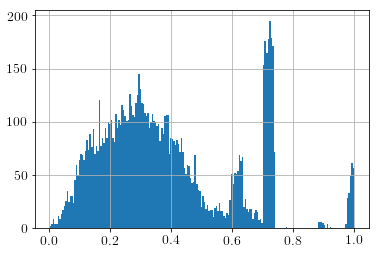

In [15]:
output_df["z_sim"].hist(bins = 200)

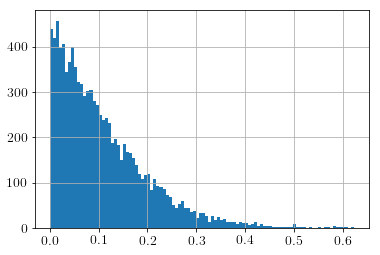

In [16]:
output_df["host_EBV"].hist(bins=100)

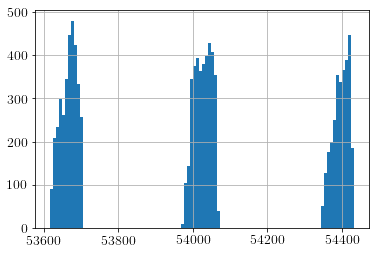

In [17]:
output_df["mjdmax"].hist(bins=100)